In [7]:
#import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df  = pd.read_csv('task data.csv')
df.columns

Index(['task_id', 'title', 'description', 'priority', 'status', 'assigned_to',
       'deadline', 'created_at', 'category'],
      dtype='object')

In [9]:
df.isnull().sum()
df = df.dropna().reset_index(drop=True)

In [10]:
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['deadline'] = pd.to_datetime(df['deadline'], errors='coerce')
df['task_completion_days'] = (df['deadline'] - df['created_at']).dt.days


In [11]:
df.isnull().sum()

task_id                 0
title                   0
description             0
priority                0
status                  0
assigned_to             0
deadline                1
created_at              1
category                0
task_completion_days    1
dtype: int64

In [12]:
df.duplicated().sum() 

np.int64(1475)

In [13]:
df.describe()

,deadline,created_at,task_completion_days
count,2951,2951,2951.000000
mean,2025-05-14 15:12:00.975940352,2025-04-15 03:21:02.622839808,29.493731
min,2025-03-18 00:00:00,2025-03-16 00:00:00,0.000000
25%,2025-05-01 00:00:00,2025-03-31 00:00:00,12.000000
50%,2025-05-18 00:00:00,2025-04-16 00:00:00,27.000000
75%,2025-05-31 00:00:00,2025-04-30 00:00:00,43.000000
max,2025-06-13 00:00:00,2025-05-14 00:00:00,88.000000
std,NaN,NaN,20.050222


In [14]:
df.describe(include='object')

,task_id,title,description,priority,status,assigned_to,category
count,2952,2952,2952,2952,2952,2952,2952
unique,1477,14,16,8,6,9,11
top,1499,Fix Login Bug,Update the navigation bar as per the new UI gu...,Medium,Open,Diana,Refactor
freq,2,362,330,995,1066,610,628


In [15]:
df.head()   

,task_id,title,description,priority,status,assigned_to,deadline,created_at,category,task_completion_days
0,1,Update Database Schema,Write unit tests for the newly added features.,Medium,Completed,Charlie,2025-03-25,2025-03-17,Feature,8.0
1,2,Create Unit Tests,Write unit tests for the newly added features.,High,Open,Eve,2025-05-26,2025-05-06,Documentation,20.0
2,3,Fix UI Glitches,Update the navigation bar as per the new UI gu...,Low,Completed,Alice,2025-04-23,2025-04-10,Improvement,13.0
3,4,Create Unit Tests,Fix alignment and spacing issues on the mobile...,Medium,In Progress,Eve,2025-05-05,2025-04-24,Feature,11.0
4,5,Update Database Schema,Improve the performance of the backend queries.,Medium,Completed,Eve,2025-06-10,2025-04-27,Documentation,44.0


In [16]:
df['priority'].value_counts()

priority
Medium          995
High            990
Low             958
measure           2
relationship      2
design            2
oil               2
priority          1
Name: count, dtype: int64

In [17]:
# Keep only specific categories in 'priority'
allowed_priorities = ['High', 'Medium', 'Low']
df = df[df['priority'].isin(allowed_priorities)].reset_index(drop=True)
df['priority'].value_counts()

priority
Medium    995
High      990
Low       958
Name: count, dtype: int64

In [18]:
df['status'].value_counts()


status
Open           1064
In Progress    1019
Completed       856
meet              2
finish            2
Name: count, dtype: int64

In [19]:
allowed_statuses = ['Completed', 'In Progress', 'Open']
df = df[df['status'].isin(allowed_statuses)].reset_index(drop=True)
df['status'].value_counts()

status
Open           1064
In Progress    1019
Completed       856
Name: count, dtype: int64

In [20]:
df['category'].value_counts()

category
Refactor         626
Bug              607
Feature          572
Documentation    570
Improvement      558
resource           2
itself             2
former             2
Name: count, dtype: int64

In [21]:
alloed_categories = ['Refactor', 'Bug', 'Feature', 'Documentation',"Improvement"]
df = df[df['category'].isin(alloed_categories)].reset_index(drop=True)
df['category'].value_counts()

category
Refactor         626
Bug              607
Feature          572
Documentation    570
Improvement      558
Name: count, dtype: int64

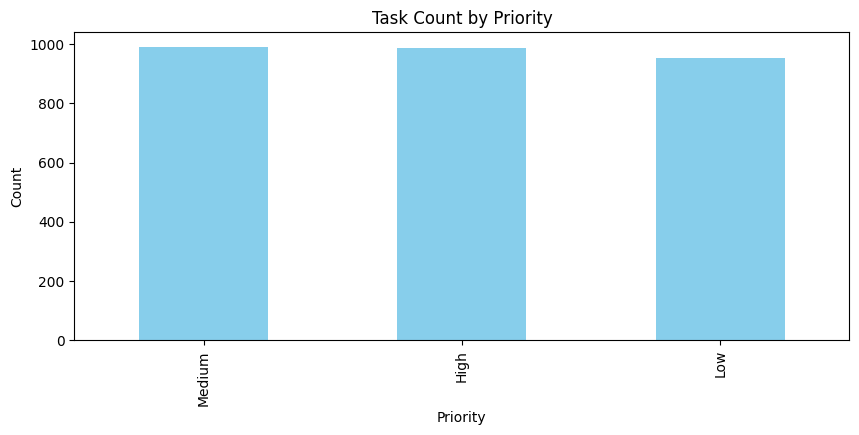

In [22]:
# 4. Univariate Analysis

# Bar charts for categorical features
plt.figure(figsize=(10, 4))
df['priority'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Task Count by Priority')
plt.xlabel('Priority')
plt.ylabel('Count')
plt.show()

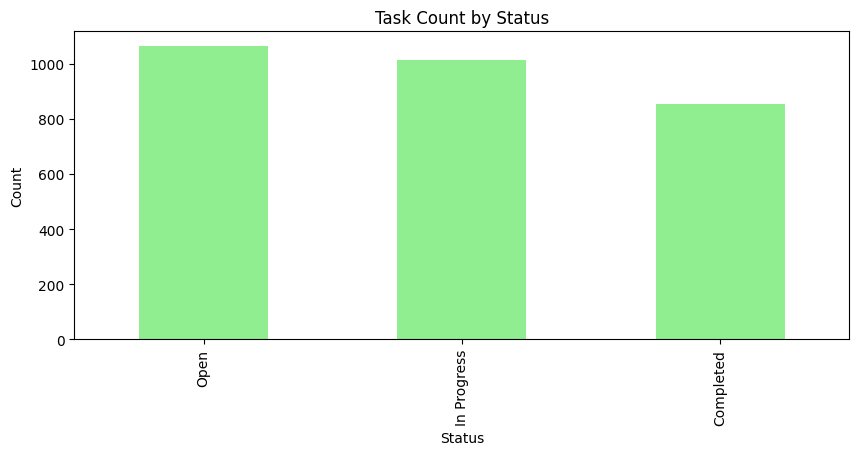

In [23]:
# Pie chart for task status
plt.figure(figsize=(10, 4))
df['status'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Task Count by Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()


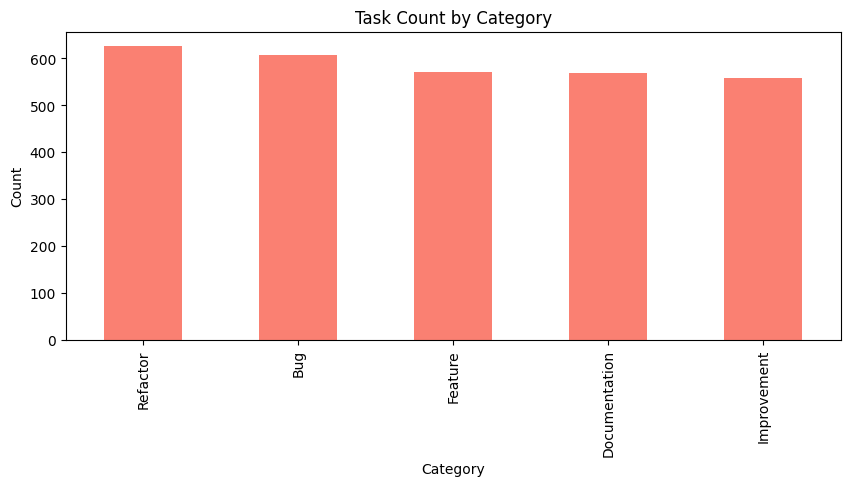

In [24]:
#bar chart for task category
plt.figure(figsize=(10, 4))
df['category'].value_counts().plot(kind='bar', color='salmon')
plt.title('Task Count by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

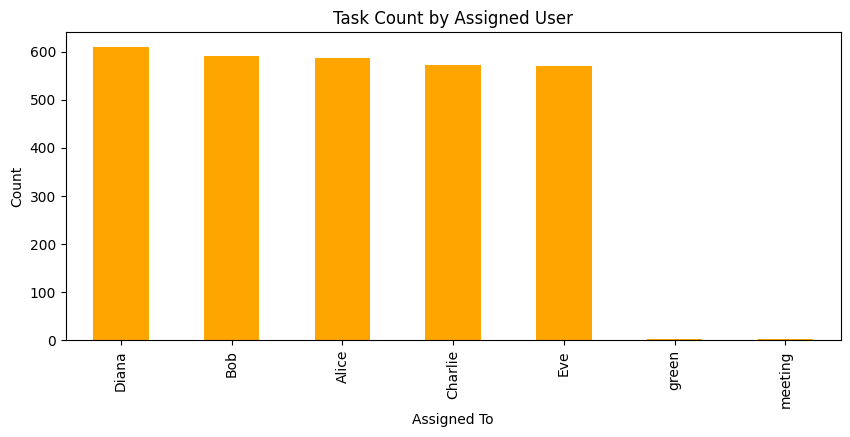

In [25]:
#bar chart for assigned user
plt.figure(figsize=(10, 4))
df['assigned_to'].value_counts().plot(kind='bar', color='orange')
plt.title('Task Count by Assigned User')
plt.xlabel('Assigned To')
plt.ylabel('Count')
plt.show()

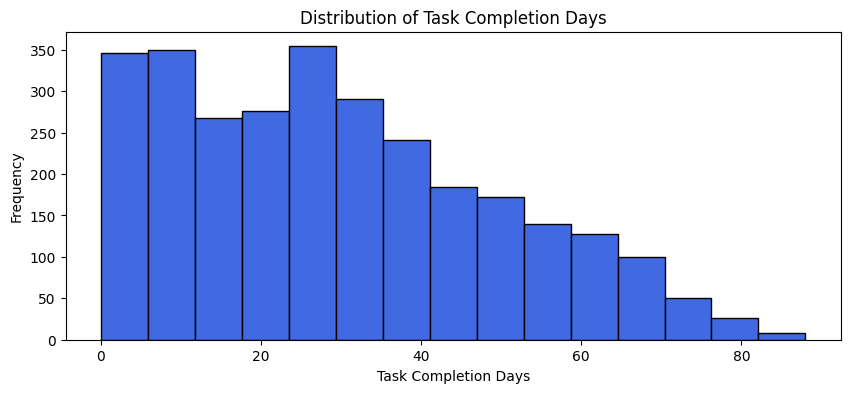

In [26]:
# Histogram for numerical feature
plt.figure(figsize=(10, 4))
plt.hist(df['task_completion_days'], bins=15, color='royalblue', edgecolor='black')
plt.title('Distribution of Task Completion Days')
plt.xlabel('Task Completion Days')
plt.ylabel('Frequency')
plt.show()

<Figure size 800x500 with 0 Axes>

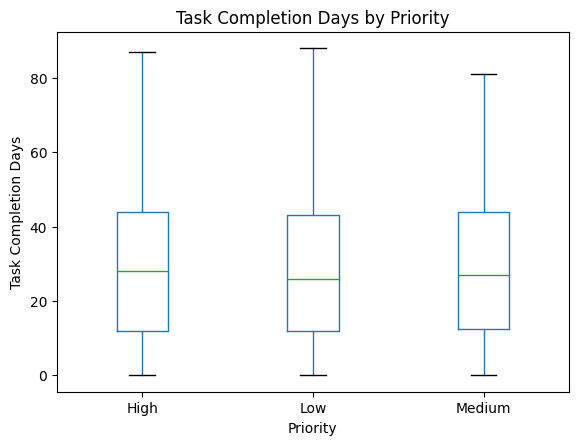

In [27]:
# 5. Bivariate Analysis

# Boxplot: Task completion days by priority
plt.figure(figsize=(8, 5))
df.boxplot(column='task_completion_days', by='priority', grid=False)
plt.title('Task Completion Days by Priority')
plt.suptitle('')
plt.xlabel('Priority')
plt.ylabel('Task Completion Days')
plt.show()

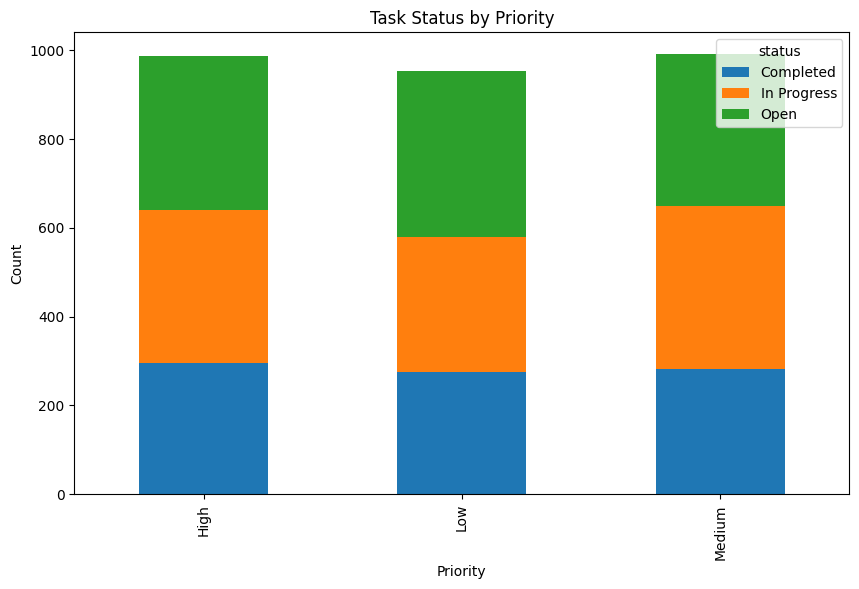

In [28]:

# Stacked bar: Task status by priority
status_priority = pd.crosstab(df['priority'], df['status'])
status_priority.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Task Status by Priority')
plt.xlabel('Priority')
plt.ylabel('Count')
plt.show()

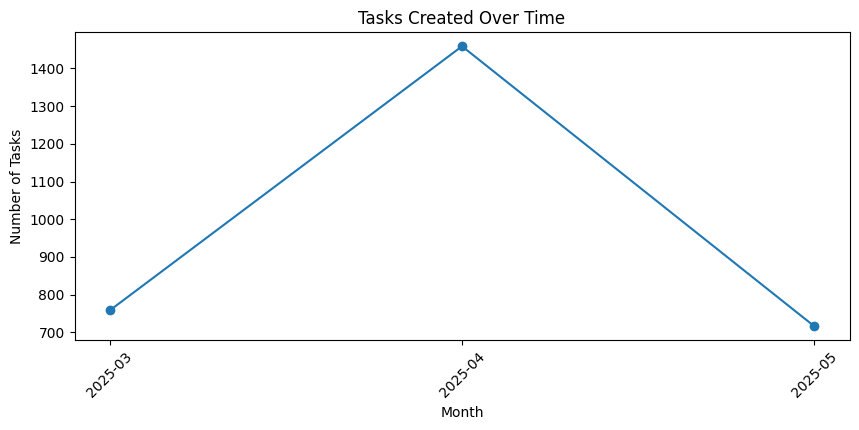

In [29]:
# 6. Time-based Analysis

# Tasks created over time (by month)
df['created_month'] = df['created_at'].dt.to_period('M').astype(str)
created_counts = df['created_month'].value_counts().sort_index()
plt.figure(figsize=(10, 4))
plt.plot(created_counts.index, created_counts.values, marker='o')
plt.title('Tasks Created Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Tasks')
plt.xticks(rotation=45)
plt.show()

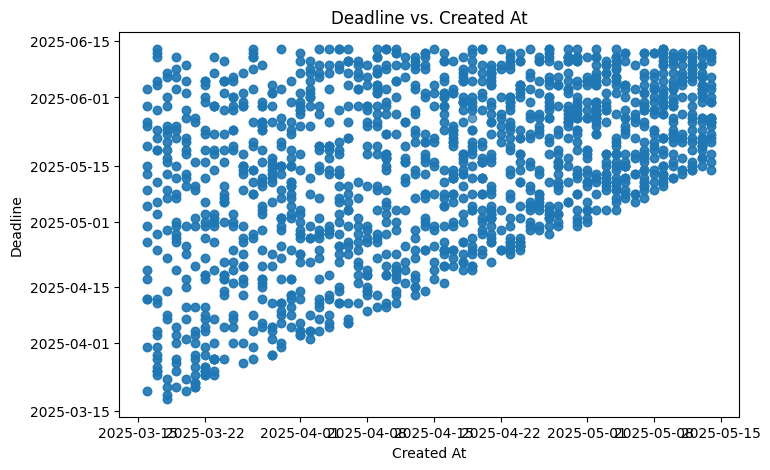

In [30]:

# Deadline vs. created_at scatter
plt.figure(figsize=(8, 5))
plt.scatter(df['created_at'], df['deadline'], alpha=0.7)
plt.title('Deadline vs. Created At')
plt.xlabel('Created At')
plt.ylabel('Deadline')
plt.show()

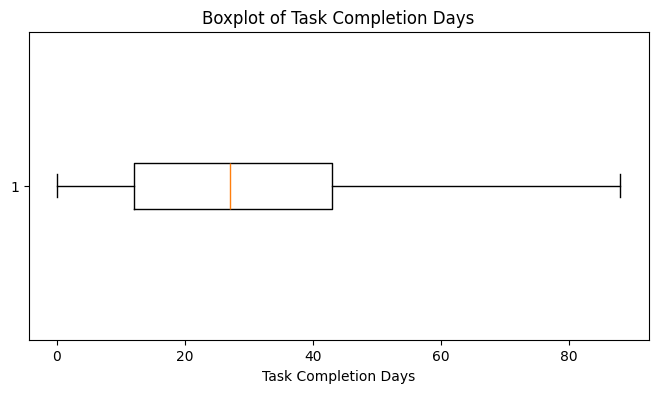

In [31]:
# 8. Outlier Detection

plt.figure(figsize=(8, 4))
plt.boxplot(df['task_completion_days'].dropna(), vert=False)
plt.title('Boxplot of Task Completion Days')
plt.xlabel('Task Completion Days')
plt.show()